In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Transformed Data Set - Sheet1.csv')
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


<AxesSubplot:xlabel='Gender', ylabel='count'>

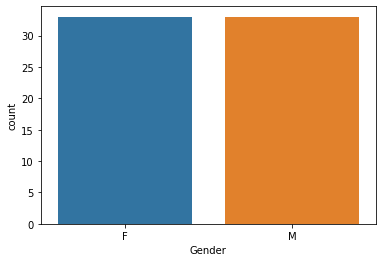

In [4]:
sns.countplot(x='Gender',data=df)

In [5]:
df['Favorite Color'].unique()#all Favorite Colors

array(['Cool', 'Neutral', 'Warm'], dtype=object)

<AxesSubplot:>

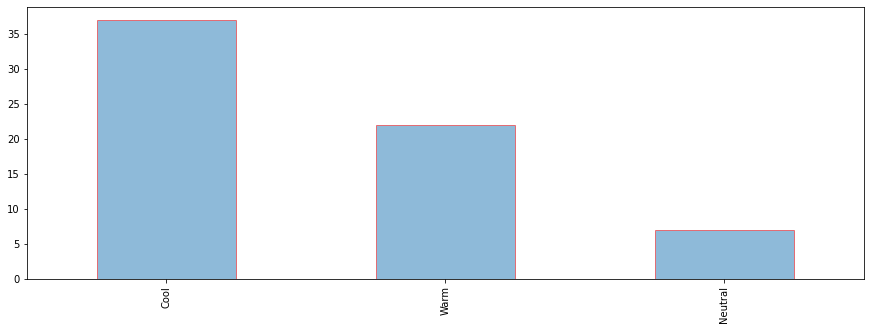

In [6]:
plt.figure(figsize=(15,5))
df['Favorite Color'].value_counts().plot.bar(edgecolor='red',alpha=0.5)

<AxesSubplot:xlabel='Gender', ylabel='count'>

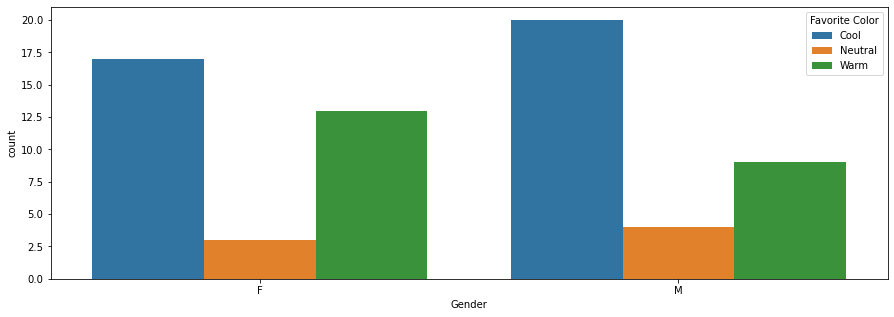

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(x='Gender',data=df,hue='Favorite Color')

In [8]:
df['Favorite Beverage'].value_counts()

Doesn't drink    14
Beer             13
Other            11
Wine             10
Vodka             9
Whiskey           9
Name: Favorite Beverage, dtype: int64

<AxesSubplot:ylabel='Favorite Beverage'>

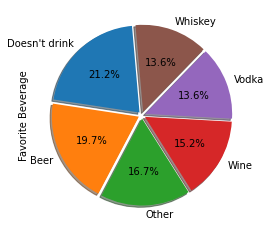

In [9]:
df['Favorite Beverage'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0.04,0.04,0.04,0.04,0.04,0.04],shadow=True,startangle = 95)

In [10]:
#Checking for missing values

In [11]:
df.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
X = df.drop('Gender', axis=1).values
y = df['Gender'].values

In [14]:
X.shape, y.shape

((66, 4), (66,))

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)

In [16]:
df.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [17]:
dummies = pd.get_dummies(df[['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage','Favorite Soft Drink']])
dummies

,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Electronic,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,Favorite Beverage_Beer,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_7UP/Sprite,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other
0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
62,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
63,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
64,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [18]:
df["Favorite Color"] = df["Favorite Color"].astype(object)
X = pd.get_dummies(df[['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink']])
X

,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Electronic,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,Favorite Beverage_Beer,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_7UP/Sprite,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other
0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
62,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
63,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
64,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
KT = knn.score(X_train, y_train)
KT

0.7884615384615384

In [22]:
KTT = knn.score(X_test, y_test)
KTT

0.5

In [23]:
# Make predictions
y_preds = knn.predict(X_test)

In [24]:
y_preds[:10]

array(['F', 'F', 'M', 'F', 'F', 'M', 'F', 'F', 'F', 'F'], dtype=object)

<AxesSubplot:>

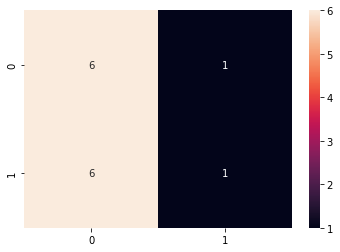

In [25]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_preds)
sns.heatmap(cm,annot=True)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           F       0.50      0.86      0.63         7
           M       0.50      0.14      0.22         7

    accuracy                           0.50        14
   macro avg       0.50      0.50      0.43        14
weighted avg       0.50      0.50      0.43        14



In [27]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# With cross-validation
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    knn.fit(X_train, y_train)
    print(f"Model accuracy on test set: {knn.score(X_test, y_test) * 100}%")
    print(f"Cross-validation score: {np.mean(cross_val_score(knn, X, y, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 50.0%
Cross-validation score: 48.57142857142856%

Trying model with 20 estimators...
Model accuracy on test set: 50.0%
Cross-validation score: 48.57142857142856%

Trying model with 30 estimators...
Model accuracy on test set: 50.0%
Cross-validation score: 48.57142857142856%

Trying model with 40 estimators...
Model accuracy on test set: 50.0%
Cross-validation score: 48.57142857142856%

Trying model with 50 estimators...
Model accuracy on test set: 50.0%
Cross-validation score: 48.57142857142856%

Trying model with 60 estimators...
Model accuracy on test set: 50.0%
Cross-validation score: 48.57142857142856%

Trying model with 70 estimators...
Model accuracy on test set: 50.0%
Cross-validation score: 48.57142857142856%

Trying model with 80 estimators...
Model accuracy on test set: 50.0%
Cross-validation score: 48.57142857142856%

Trying model with 90 estimators...
Model accuracy on test set: 50.0%
Cross-validation score: 48.

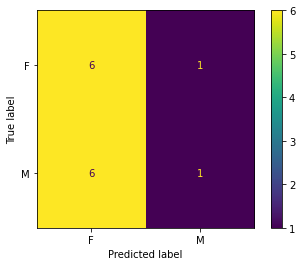

In [28]:
# Plot confusion matrix from predictions
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

In [29]:
y_pred_probs = knn.predict_proba(X_test)[:,1]
y_pred_probs

array([0.33333333, 0.33333333, 0.66666667, 0.33333333, 0.33333333,
       0.66666667, 0.33333333, 0.        , 0.33333333, 0.        ,
       0.        , 0.33333333, 0.33333333, 0.33333333])